In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

In [51]:
df = pd.read_csv('medical_insurance.csv')
df.head(10)

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
5,76435,63,Female,North,Rural,305000,HS,Single,Employed,3,...,0,0,0,0,0,0,0,1,1,0
6,84005,36,Male,West,Rural,38900,Masters,Single,Employed,1,...,0,0,0,1,0,1,0,1,0,0
7,80918,21,Female,South,Suburban,83700,HS,Single,Employed,3,...,0,0,0,2,1,0,0,1,0,1
8,60768,53,Male,North,Suburban,60700,No HS,Divorced,Retired,1,...,0,0,0,0,0,1,0,1,1,0
9,50075,28,Male,South,Urban,23600,Bachelors,Married,Employed,4,...,0,0,0,0,0,2,0,0,0,0


In [52]:
# stats
df.info(verbose=True)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  int64  
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [53]:
# basic check for demographic columns
demographic_cols = df.columns[1:12]

for col in demographic_cols:
    null_val = df[col].isna().sum()
    zero_count = df[col].eq(0).sum()

    # print(f"Total null values in '{col}': {null_val}")
    print(f"Total zero values in '{col}': {zero_count}")

# drop values in age = 0
df.drop(df[df['age'] == 0].index, inplace=True)

print(df['age'].eq(0).sum())

Total zero values in 'age': 165
Total zero values in 'sex': 0
Total zero values in 'region': 0
Total zero values in 'urban_rural': 0
Total zero values in 'income': 0
Total zero values in 'education': 0
Total zero values in 'marital_status': 0
Total zero values in 'employment_status': 0
Total zero values in 'household_size': 0
Total zero values in 'dependents': 40836
Total zero values in 'bmi': 0
0


In [54]:
print("Unique values for categorical cols")
for col in df.columns:
    if df[col].dtype == object:
        print(f"{col}: {df[col].unique()}")

Unique values for categorical cols
sex: ['Female' 'Male' 'Other']
region: ['North' 'Central' 'West' 'South' 'East']
urban_rural: ['Suburban' 'Urban' 'Rural']
education: ['Doctorate' 'No HS' 'HS' 'Some College' 'Masters' 'Bachelors']
marital_status: ['Married' 'Single' 'Divorced' 'Widowed']
employment_status: ['Retired' 'Employed' 'Self-employed' 'Unemployed']
smoker: ['Never' 'Current' 'Former']
alcohol_freq: [nan 'Weekly' 'Daily' 'Occasional']
plan_type: ['PPO' 'POS' 'HMO' 'EPO']
network_tier: ['Bronze' 'Gold' 'Platinum' 'Silver']


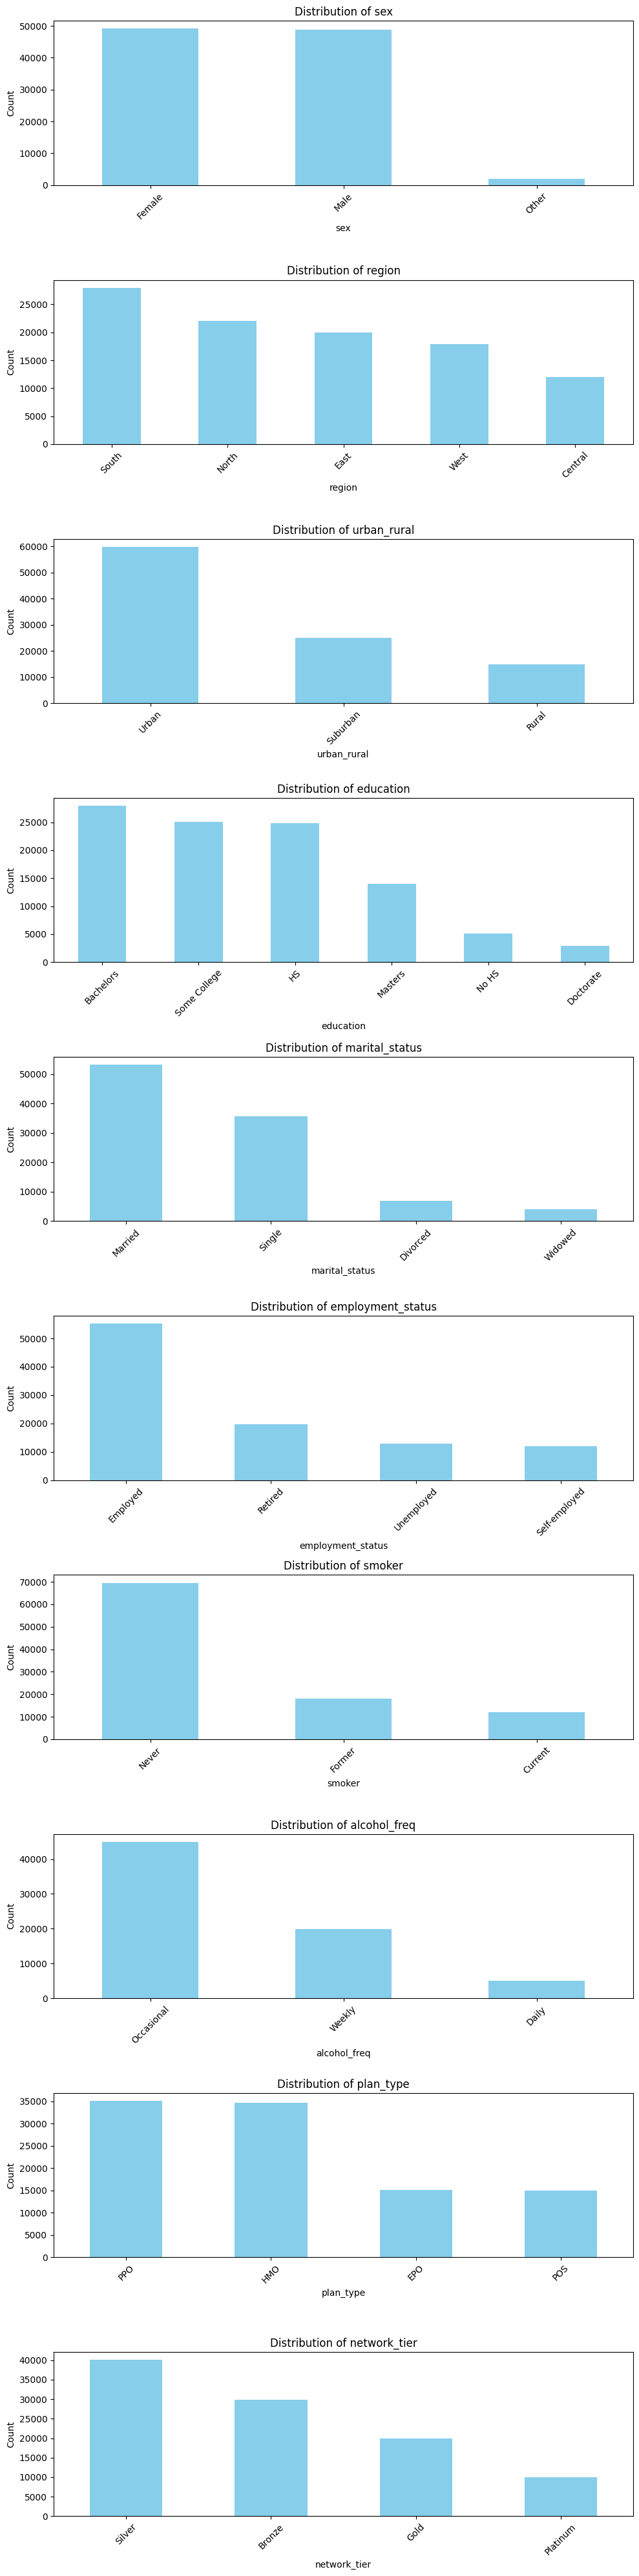

In [55]:
categorical_cols = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 4 * len(categorical_cols)))

# plot distribution for each categorical column
for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [56]:
# drop 'Other' age
df.drop(df[df['age'] == 'Other'].index, inplace=True)
df.count()

person_id                      99835
age                            99835
sex                            99835
region                         99835
urban_rural                    99835
income                         99835
education                      99835
marital_status                 99835
employment_status              99835
household_size                 99835
dependents                     99835
bmi                            99835
smoker                         99835
alcohol_freq                   69798
visits_last_year               99835
hospitalizations_last_3yrs     99835
days_hospitalized_last_3yrs    99835
medication_count               99835
systolic_bp                    99835
diastolic_bp                   99835
ldl                            99835
hba1c                          99835
plan_type                      99835
network_tier                   99835
deductible                     99835
copay                          99835
policy_term_years              99835
p

Feature Engineering

In [57]:
# Features = lifestyle_risk_score, is_high_bp, health_risk_index, healthcare_visit_frequency, medication_load
def engineer_health_features(df):
    df = df.copy()

    # age_group
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 25, 40, 55, 65, 120],
        labels=["young", "adult", "mid_age", "senior", "elderly"]
    )
    
    # lifestyle_risk_score
    df["lifestyle_risk_score"] = (
        (df["smoker"] == "yes").astype(int) +
        (df["alcohol_freq"].isin(["daily", "weekly"])).astype(int) +
        (df["bmi"] > 30).astype(int)
    )
    
    # is_high_bp
    df["is_high_bp"] = (
        (df["systolic_bp"] >= 140) | 
        (df["diastolic_bp"] >= 90)
    ).astype(int)

    # health_risk_index
    df["health_risk_index"] = (
        (df["bmi"] > 30).astype(int) +
        df["is_high_bp"] +
        (df["ldl"] > 160).astype(int) +
        (df["hba1c"] >= 6.5).astype(int)
    )
    
    # healthcare_visit_frequency
    utilization_cols = [
        "visits_last_year",
        "hospitalizations_last_3yrs",
        "proc_consult_count",
        "proc_lab_count",
        "proc_imaging_count",
        "proc_surgery_count",
        "proc_physio_count"
    ]
    df["healthcare_visit_frequency"] = df[utilization_cols].sum(axis=1)

    # medication_load
    df['medication_load'] = np.log1p(df["medication_count"])


    return df


In [58]:
df = engineer_health_features(df)

df[['age_group', 'lifestyle_risk_score', 'is_high_bp', 'health_risk_index', 'healthcare_visit_frequency', 'medication_load']].head(10)

,age_group,lifestyle_risk_score,is_high_bp,health_risk_index,healthcare_visit_frequency,medication_load
0,mid_age,0,0,0,6,1.609438
1,elderly,0,0,0,4,1.386294
2,elderly,1,1,2,5,1.609438
3,young,1,0,3,2,0.693147
4,mid_age,1,0,2,7,1.098612
5,senior,0,1,1,2,1.098612
6,adult,0,0,0,3,0.000000
7,young,1,0,3,7,0.693147
8,mid_age,0,0,0,2,0.000000
9,adult,1,0,1,2,0.000000


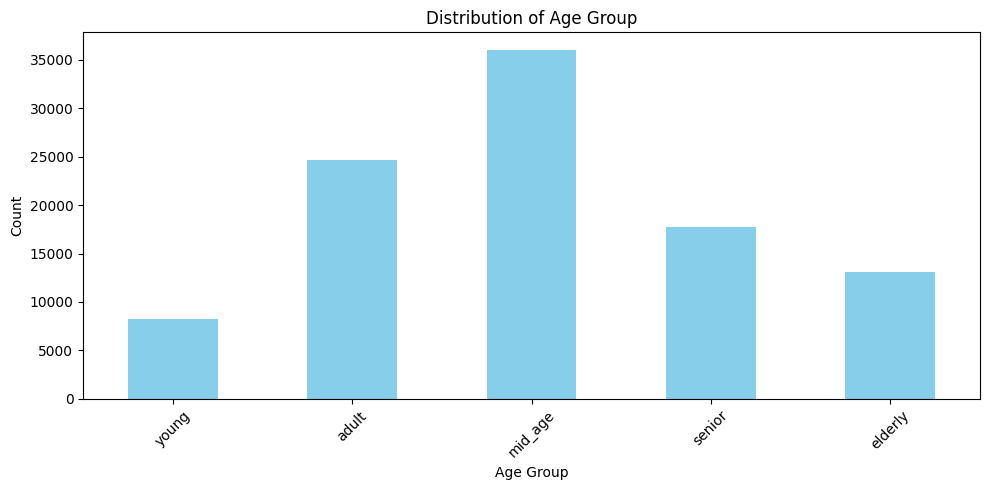

In [59]:
df['age_group'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# encode categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"All categorical columns: {categorical_cols}")

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

All categorical columns: Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier', 'age_group'],
      dtype='object')


Feature Selection

In [61]:
# remove columns to prevent leakage
leakage_columns = [
    'monthly_premium',
    'annual_medical_cost',
    'claims_count',
    'avg_claim_amount',
    'total_claims_paid',
    'risk_score',
    'provider_quality',
    'had_major_procedure',
    'policy_changes_last_2yrs'
]

print(f"\nColumns to remove: {leakage_columns}")

columns_to_drop = [col for col in leakage_columns if col in df.columns]
print(f"Columns found in dataframe: {columns_to_drop}")

# Drop the columns
if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"Dropped {len(columns_to_drop)} columns")
else:
    print("No leakage columns found in dataframe")

print(f"\nRemaining columns: {df.columns.tolist()}")


Columns to remove: ['monthly_premium', 'annual_medical_cost', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'risk_score', 'provider_quality', 'had_major_procedure', 'policy_changes_last_2yrs']
Columns found in dataframe: ['monthly_premium', 'annual_medical_cost', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'risk_score', 'provider_quality', 'had_major_procedure', 'policy_changes_last_2yrs']
Dropped 9 columns

Remaining columns: ['person_id', 'age', 'sex', 'region', 'urban_rural', 'income', 'education', 'marital_status', 'employment_status', 'household_size', 'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years', 'annual_premium', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 

In [62]:
# correlation
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# filter
filter_selector = SelectKBest(score_func=mutual_info_regression, k='all')

X = df.drop('annual_premium', axis=1)
y = df['annual_premium']
filter_selector.fit(X, y)
filter_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': filter_selector.scores_
}).sort_values('Score', ascending=False)
print(filter_scores)

# embedded
embedded_selector = SelectFromModel(
    estimator=LassoCV(cv=5),
    threshold="median"
)

embedded_selector.fit(X, y)
selected_features_embedded = X.columns[embedded_selector.get_support()].tolist()
print(f"Selected features: {selected_features_embedded}")
print(f"Number of features selected: {len(selected_features_embedded)}")

# wrapper
wrapper_selector = RFE(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_features_to_select=10
)

wrapper_selector.fit(X, y)
selected_features_wrapper = X.columns[wrapper_selector.support_].tolist()
print(f"Selected features: {selected_features_wrapper}")
print(f"Number of features selected: {len(selected_features_wrapper)}")

                             person_id       age       sex    region  \
person_id                     1.000000 -0.000640  0.000350 -0.000202   
age                          -0.000640  1.000000  0.000378  0.002316   
sex                           0.000350  0.000378  1.000000  0.000045   
region                       -0.000202  0.002316  0.000045  1.000000   
urban_rural                   0.001411 -0.001053 -0.003676 -0.003158   
income                        0.002178  0.005642 -0.000663  0.002071   
education                    -0.002429 -0.005304 -0.007105 -0.005289   
marital_status                0.000790 -0.003322 -0.001659 -0.000403   
employment_status             0.002912  0.002205 -0.003738 -0.000526   
household_size               -0.004317  0.000872 -0.002124  0.000414   
dependents                   -0.004832 -0.000840 -0.000145  0.001661   
bmi                          -0.000428  0.002497  0.000719 -0.001636   
smoker                       -0.002220  0.008313  0.006790  0.00